In [1]:
import pandas as pd
import numpy as np

d1=pd.read_csv('/Users/lambardaar/Desktop/STUDY/python/black_friday_eda/test.csv')
d2=pd.read_csv('/Users/lambardaar/Desktop/STUDY/python/black_friday_eda/train.csv')

df=pd.concat([d1,d2])
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN


In [2]:
#label incoding of gender(handeling categorical feature)
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,1,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,1,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,0,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,0,36-45,1,B,4+,1,4,9.0,NaN,NaN


In [3]:
#encoding using map on age 
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Age']=le.fit_transform(df['Age'])
df['Age']=df['Age']+1
for i, val in enumerate(le.classes_):
    print(f"{val} → {i}")

0-17 → 0
18-25 → 1
26-35 → 2
36-45 → 3
46-50 → 4
51-55 → 5
55+ → 6


In [4]:
df['Age'].unique()

array([5, 3, 4, 2, 6, 7, 1])

In [5]:
#encoding city categories 
df['City_Category'].unique()
df_city=pd.get_dummies(df['City_Category'],drop_first=True,dtype=int)


df=pd.concat([df,df_city],axis=1)


#dropping city_category
df.drop('City_Category',axis=1,inplace=True)
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000004,P00128942,1,5,7,2,1,1,11.0,NaN,NaN,1,0
1,1000009,P00113442,1,3,17,0,0,3,5.0,NaN,NaN,0,1
2,1000010,P00288442,0,4,1,4+,1,5,14.0,NaN,NaN,1,0
3,1000010,P00145342,0,4,1,4+,1,4,9.0,NaN,NaN,1,0
4,1000011,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1
5,1000013,P00350442,1,5,1,3,1,2,3.0,15.0,NaN,0,1
6,1000013,P00155442,1,5,1,3,1,1,11.0,15.0,NaN,0,1
7,1000013,P0094542,1,5,1,3,1,2,4.0,9.0,NaN,0,1
8,1000015,P00161842,1,3,7,1,0,10,13.0,16.0,NaN,0,0
9,1000022,P00067942,1,2,15,4+,0,5,14.0,NaN,NaN,0,0


#handling null values by mode.


In [6]:
#handling null values by mode.
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [7]:
#handling null values by mode.
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_1'].mode()[0])
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_2'].mode()[0])

handling Stay_In_Current_City_Years column


In [8]:
#handling Stay_In_Current_City_Years column
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')
df['Stay_In_Current_City_Years'].unique()

#changing object to int 
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  int64  
 12  C                           783667 non-null  int64  
dtypes: float64(3), int6

visualization


<Axes: xlabel='Age', ylabel='Purchase'>

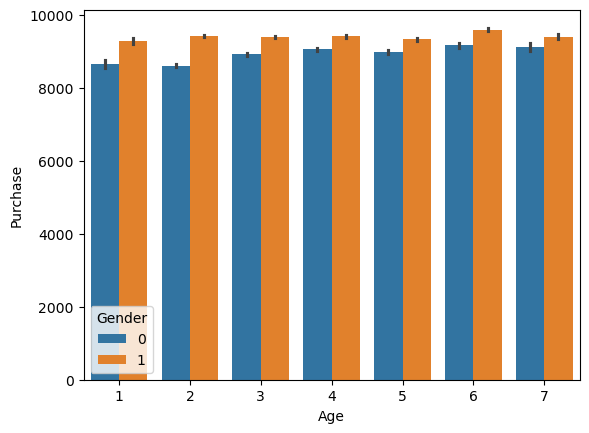

In [9]:
#bar_plot
import seaborn as sns
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

In [10]:
df.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000004,P00128942,1,5,7,2,1,1,11.0,5.0,NaN,1,0
1,1000009,P00113442,1,3,17,0,0,3,5.0,5.0,NaN,0,1
2,1000010,P00288442,0,4,1,4,1,5,14.0,5.0,NaN,1,0
3,1000010,P00145342,0,4,1,4,1,4,9.0,5.0,NaN,1,0


<Axes: xlabel='Occupation', ylabel='Purchase'>

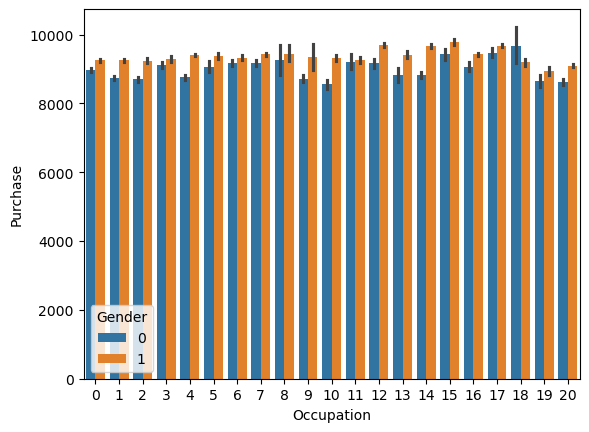

In [11]:
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

..............feature_scaling

In [12]:
# df_test contains all rows where the Purchase column is null (missing values).
# df_train contains all rows where the Purchase column is not null (actual purchase values are present).
df_test=df[df['Purchase'].isnull()]
df_train=df[~df['Purchase'].isnull()]

# Why is this used?

# In machine learning tasks, especially supervised learning, you need a training set (with known target values) and a test set (where the target is missing and needs to be predicted).
# Here, df_train will be used to train a model to predict purchase amounts, and df_test will be used to make predictions for cases where the purchase amount is unknown.


In [ ]:
from sklearn.model_selection import train_test_split
X = df_train.drop('Purchase', axis=1)
y = df_train['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#dropping the object type so the standardScaler process the numerical value.
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)



,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
84432,1001062,1,6,19,3,0,1,2.0,16.0,0,1
72724,1005172,0,4,11,1,0,1,15.0,16.0,1,0
197032,1000415,0,4,0,2,1,8,15.0,5.0,0,0
353704,1000496,1,2,4,3,0,1,15.0,16.0,0,0
91198,1002010,1,2,4,0,0,6,8.0,16.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
196106,1000264,1,4,0,1,1,8,5.0,5.0,1,0
109474,1004842,0,4,1,1,0,11,15.0,5.0,0,1
433228,1000718,1,2,2,2,0,3,5.0,5.0,0,1
271831,1005882,1,4,7,1,0,1,2.0,15.0,0,1


In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)



#############.now do data_modeling

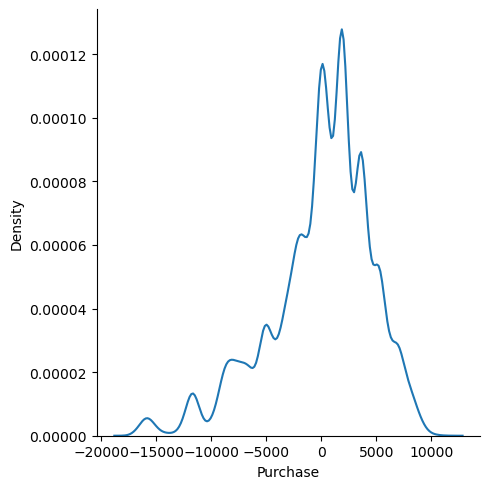

In [21]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(X_train,y_train)


pred=regression.predict(X_test)
import seaborn as sns
sns.displot(pred-y_test,kind='kde')


In [20]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
score

0.14555287585329146

0-17 → 0
18-25 → 1
26-35 → 2
36-45 → 3
46-50 → 4
51-55 → 5
55+ → 6
R2 Score: 0.14555287585329146


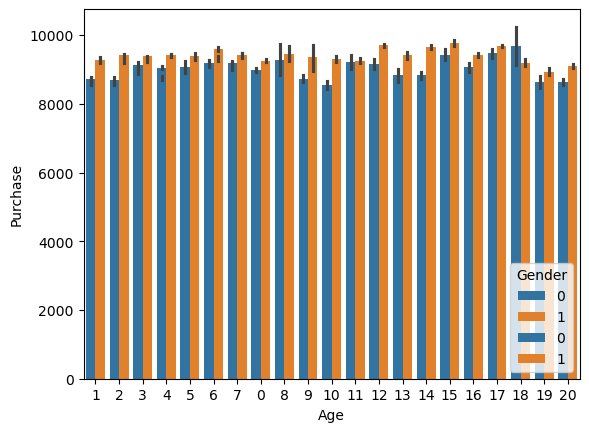

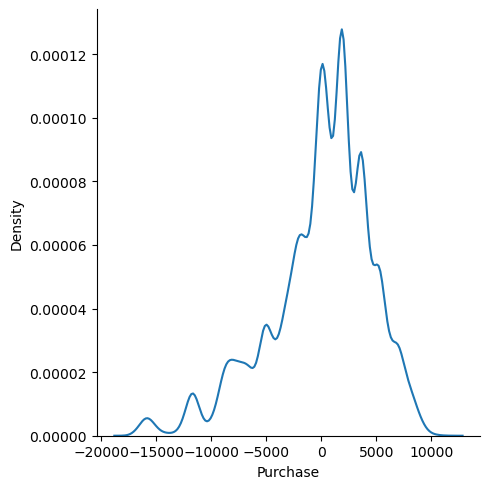

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

# Load data
d1 = pd.read_csv('/Users/lambardaar/Desktop/STUDY/python/black_friday_eda/test.csv')
d2 = pd.read_csv('/Users/lambardaar/Desktop/STUDY/python/black_friday_eda/train.csv')
df = pd.concat([d1, d2])

# Label encoding for Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Label encoding for Age
le_age = LabelEncoder()
df['Age'] = le_age.fit_transform(df['Age']) + 1
for i, val in enumerate(le_age.classes_):
    print(f"{val} → {i}")

# One-hot encoding for City_Category
df_city = pd.get_dummies(df['City_Category'], drop_first=True, dtype=int)
df = pd.concat([df, df_city], axis=1)
df.drop('City_Category', axis=1, inplace=True)

# Fill missing values by mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_1'].mode()[0])
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_2'].mode()[0])

# Handle Stay_In_Current_City_Years column
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

# Visualization (optional)
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

# Split into train and test based on Purchase column
df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]

# Prepare features and target
X = df_train.drop('Purchase', axis=1)
y = df_train['Purchase']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Drop Product_ID (object type) before scaling
X_train = X_train.drop('Product_ID', axis=1)
X_test = X_test.drop('Product_ID', axis=1)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear regression modeling
regression = LinearRegression()
regression.fit(X_train, y_train)
pred = regression.predict(X_test)

# Plot residuals
sns.displot(pred - y_test, kind='kde')

# R2 score
score = r2_score(y_test, pred)
print("R2 Score:", score)